In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import pydotplus                                                    # To generate pydot file
from IPython.display import Image                                   # To generate image using pydot file
from sklearn.model_selection import GridSearchCV                    # To find best hyperparamter setting for the algorithm
from sklearn.tree import export_graphviz

In [ ]:
pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [ ]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
profile = ProfileReport(train_df, title="My_Data_Report", explorative=True)
profile.to_file("pre_processing.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 28.68it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#from google.colab import files
#files.download('pre_processing.html')

In [ ]:
def data_cleaning(df):
  df['Age']=df['Age'].fillna(value=df['Age'].median())
  df['Embarked']=df['Embarked'].fillna(value=df['Embarked'].mode()[0])
  df.drop(labels='Cabin',axis=1,inplace=True)

In [ ]:
data_cleaning(train_df)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## **Exploratory Data Analysis **

In [ ]:
def feature_engineering(df):
  train_df['Familysize'] = train_df['SibSp'] + train_df['Parch'] + 1
  train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
  train_df['Title'].replace(to_replace=['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'],
                      value=['Miss', 'Miss', 'Miss', 'Other', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'],
                      inplace=True)

In [ ]:
feature_engineering(train_df)

/tmp/ipython-input-2468279462.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Title'].replace(to_replace=['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'],


In [ ]:
train_df['Title'].value_counts()

,count
Title,
Mr,522
Miss,186
Mrs,127
Master,40
Other,16


In [ ]:
pd.crosstab(index=train_df['Sex'], columns=train_df['Title'])

Title,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,0,127,1
male,40,0,522,0,15


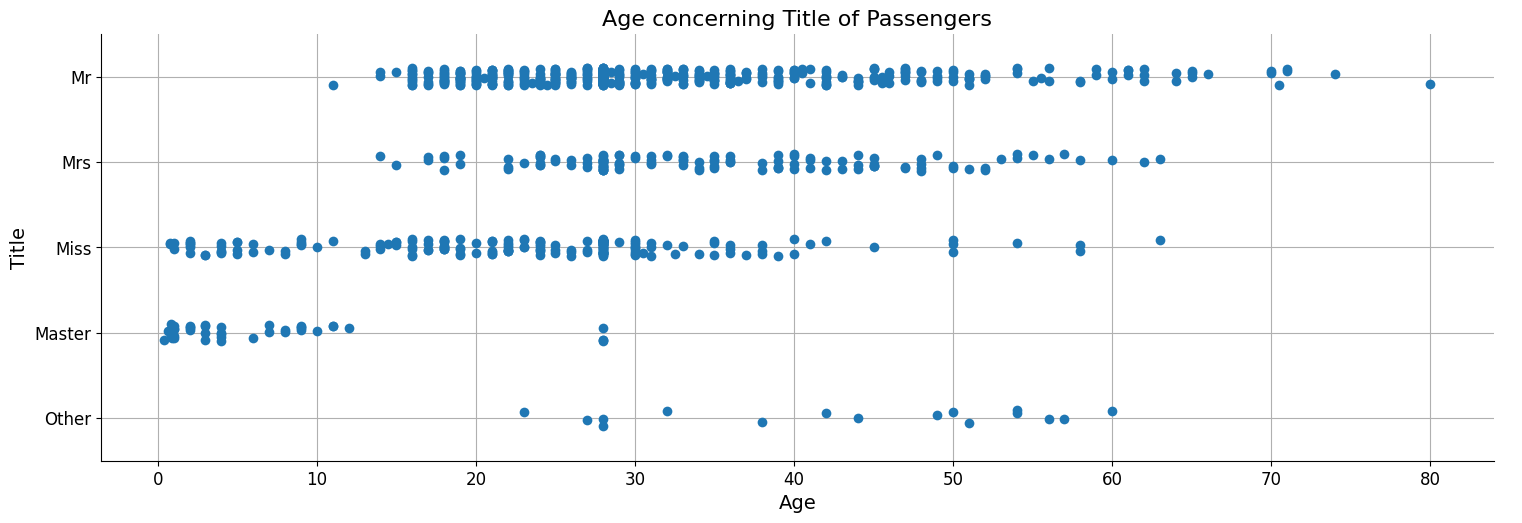

In [ ]:
sns.catplot(x="Age", y="Title", data=train_df, size=7, aspect=3)
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Age', size=14)
plt.ylabel(ylabel='Title', size=14)
plt.title(label='Age concerning Title of Passengers', size=16)
plt.grid(visible=True)
plt.show()

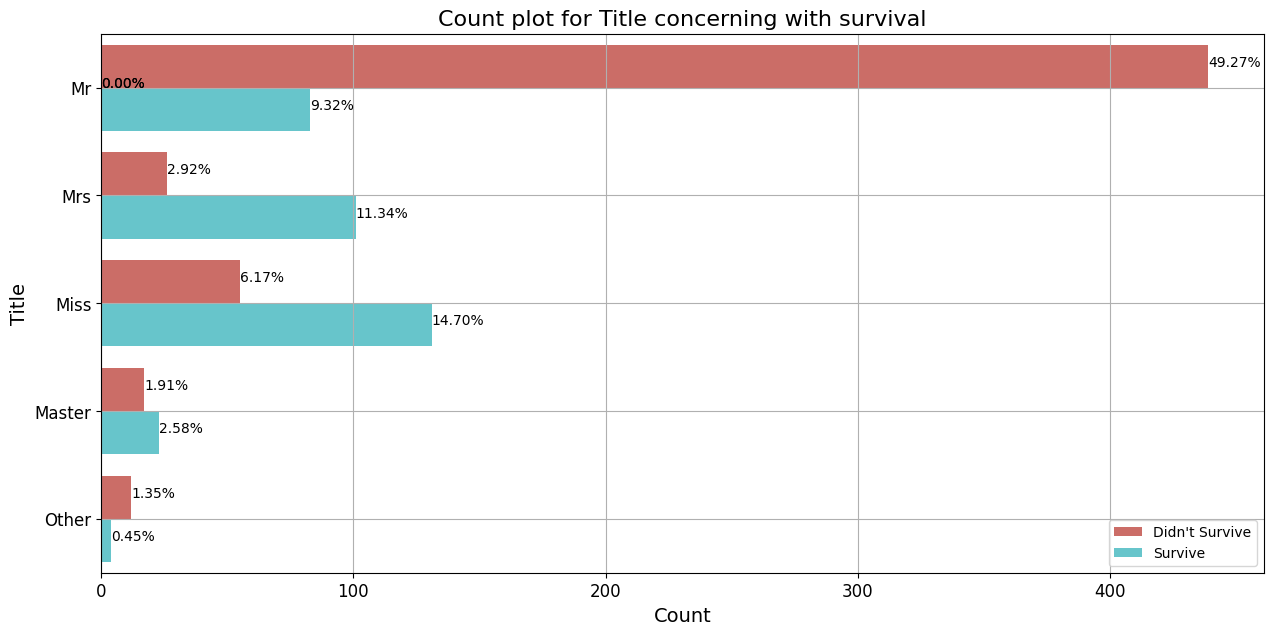

In [ ]:
fig = plt.figure(figsize=[15, 7])
ax = sns.countplot(y='Title', hue='Survived', data=train_df, palette='hls')
total = train_df.shape[0]
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y))
plt.yticks(size=12)
plt.xticks(size=12)
plt.xlabel(xlabel="Count", size=14)
plt.ylabel(ylabel='Title', size=14)
plt.title(label="Count plot for Title concerning with survival", size=16)
plt.legend(labels=["Didn't Survive", "Survive"])
plt.grid(visible=True)
plt.show()

##Post Data Processing

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Familysize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Mr


In [ ]:
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked', 'Title'])
train_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Familysize,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2,False,True,False,False,True,False,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,2,True,False,True,False,False,False,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,True,False,False,False,True,False,True,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2,True,False,False,False,True,False,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,False,True,False,False,True,False,False,True,False,False


In [ ]:
X = train_df.drop(labels=['PassengerId', 'Name', 'Ticket', 'Age', 'Fare', 'Survived'], axis=1)
y = train_df['Survived']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_df[['Age', 'Fare']])
data2 = pd.DataFrame(data=scaled_data, columns=['Age', 'Fare'])
data2.head(2)

,Age,Fare
0,-0.565736,-0.502445
1,0.663861,0.786845


In [ ]:
finalX = pd.concat(objs=[X, data2], axis=1).fillna(0)
finalX.head()

,Pclass,SibSp,Parch,Familysize,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Age,Fare
0,3,1,0,2,False,True,False,False,True,False,False,True,False,False,-0.565736,-0.502445
1,1,1,0,2,True,False,True,False,False,False,False,False,True,False,0.663861,0.786845
2,3,0,0,1,True,False,False,False,True,False,True,False,False,False,-0.258337,-0.488854
3,1,1,0,2,True,False,False,False,True,False,False,False,True,False,0.433312,0.420730
4,3,0,0,1,False,True,False,False,True,False,False,True,False,False,0.433312,-0.486337


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(finalX, y,
                                                    test_size=0.20,
                                                    random_state=42,
                                                    stratify=y)

print('X_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (712, 16)
y_train shape:  (712,)
X_test shape:  (179, 16)
y_test shape:  (179,)


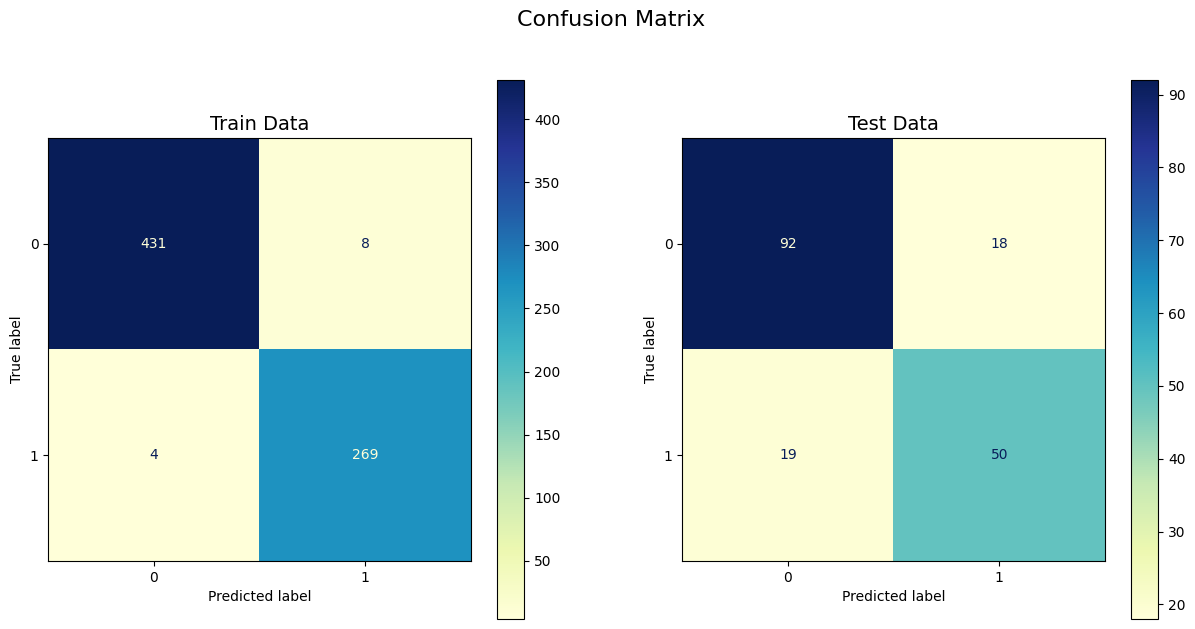

In [ ]:
dtc = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dtc.fit(x_train, y_train)
y_train_pred_count = dtc.predict(x_train)
y_test_pred_count = dtc.predict(x_test)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
ConfusionMatrixDisplay.from_estimator(estimator=dtc,X=x_train,y=y_train,values_format='.5g', cmap='YlGnBu',ax=ax1)
ConfusionMatrixDisplay.from_estimator(estimator=dtc,X=x_test,y=y_test,values_format='.5g', cmap='YlGnBu',ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(visible=False)
ax2.grid(visible=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

In [ ]:
train_report = classification_report(y_train, y_train_pred_count)
test_report = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(train_report)
print('                    Testing Report           ')
print(test_report)

                    Training Report          
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       439
           1       0.97      0.99      0.98       273

    accuracy                           0.98       712
   macro avg       0.98      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712

                    Testing Report           
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       110
           1       0.74      0.72      0.73        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



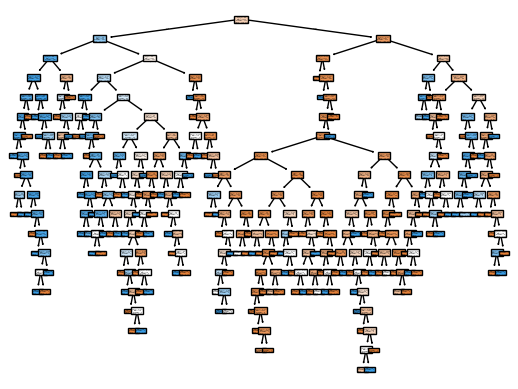

In [ ]:
plt.figure()
clf = DecisionTreeClassifier().fit(x_train, y_train)
plot_tree(clf, filled=True)
plt.show()

## Hyper Parameter Tuning

In [ ]:
dtc = DecisionTreeClassifier(random_state=42, class_weight='balanced')     # max_depth
dtc.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [ ]:
param_grid = {
             'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150, 175, 200, 500, 1000],
                'max_depth': range(4, 1000, 5)
              }

clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(4, 1000, 5)})

In [ ]:
best_model = clf.best_estimator_

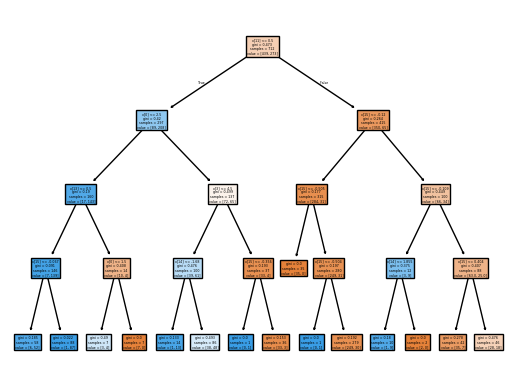

In [ ]:
plt.figure()
plot_tree(best_model, filled=True)
plt.show()

In [ ]:
clf.best_params_

{'max_depth': 4}

In [ ]:
new_preds_test = best_model.predict(x_test)
new_preds_train = best_model.predict(x_train)

In [ ]:
test_report_new = classification_report(y_test,new_preds_test)
print('                    Updated Testing Report           ')
print(test_report_new)

                    Updated Testing Report           
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       110
           1       0.80      0.77      0.79        69

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



In [ ]:
train_report_new = classification_report(y_train,new_preds_train)
print('                    Updated Training Report           ')
print(train_report_new)

                    Updated Training Report           
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       439
           1       0.81      0.79      0.80       273

    accuracy                           0.85       712
   macro avg       0.84      0.84      0.84       712
weighted avg       0.85      0.85      0.85       712



## Variable Importance

In [ ]:
feat_imps = (pd.DataFrame({'MeanDecreaseGini': best_model.feature_importances_,
              'Feature': x_train.columns})
             .sort_values('MeanDecreaseGini')
             .set_index('Feature')
            )

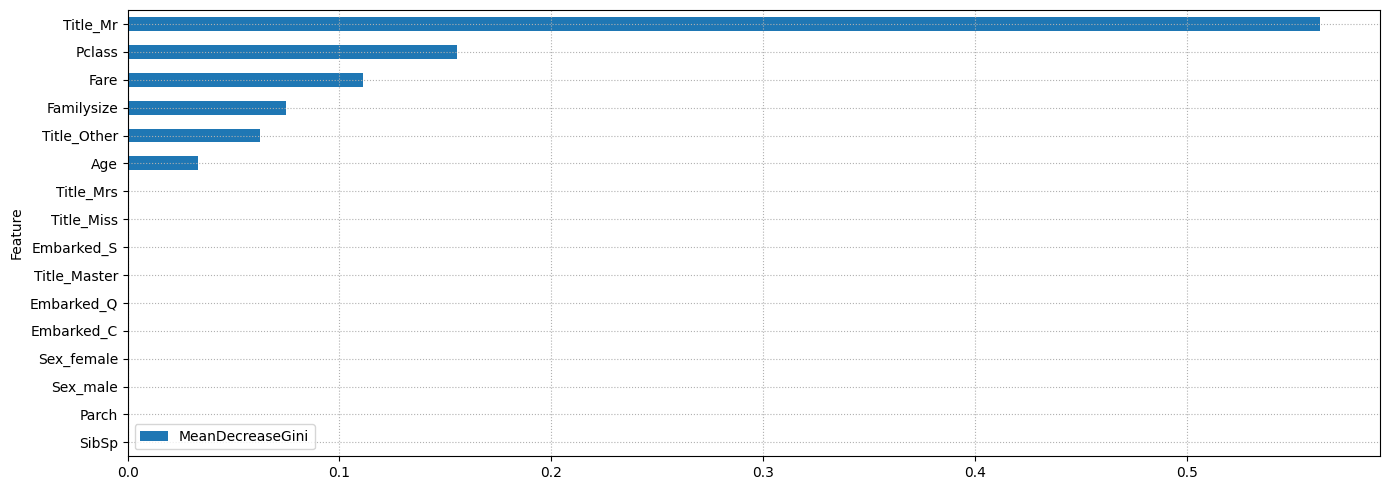

In [ ]:
fig, ax = plt.subplots(figsize=(14, 5))
feat_imps.plot.barh(ax=ax)
plt.grid(linestyle=':')
plt.tight_layout()